# Examen Primer Parcial NLP

Instrucciones:
- Lee cuidadosamente cada pregunta antes de contestar.


- No se resuelven dudas durante el examen.


- Se permite consultar apuntes, ejercicios previos e internet para contestar el examen.


- Cualquier uso de IA Generativa (ChatGPT, Google Gemini, entre otros) deberá poder ser defendido por el alumno. I.E. El alumno deberá poder explicar claramente lo que el codigo hace durante la clase de revisión de examen. **De lo contrario, dicha pregunta quedará anulada**.


- Queda **prohibido** el consultar/apoyar a otros compañeros durante la realizacion del examen.


- El examen debe estar subido a moodle a mas tardar el dia **Sabado 2 de Marzo de 2024 a las 11:59 de la noche**.


- El unico formato valido para el examen es .ipynb. Es decir, una vez terminen, deberán guardar cambios y descargar su Notebook (File/Download/Download .ipynb) Para posteriormente subir dicho archivo a Moodle **NO SE ADMITEN OTROS FORMATOS**


- Recordar que la copia en examenes es una **falta grave al codigo de la Universidad Panamericana**. La acumulación de 2 amonestaciones de este tipo devendrá en la **expulsión del alumn@ / alumn@s involucrados**


- Cualquier caso de falta disciplinaria será turnado al Comité correspondiente de acuerdo a lo marcado en el Reglamento General de la Universidad Panamericana (Artículos 206 y 207), al Reglamento de la Facultad de Ingeniería (Artículos 86, 206, 207 y 209 ) y al Código de Ética de la Facultad de Ingeniería.

In [282]:
#Utilizando el dataset "clickbait_dataset.csv", realizar lo siguiente:


In [283]:
import pandas as pd

from RegresionLogistica.tarearegresion import tsne_result

df = pd.read_csv('clickbait_dataset.csv')
df.head()


,headline,clickbait
0,This Is What $1 USD Gets You In Food All Aroun...,1
1,Make These Easy Chicken Fajita Quesadillas At ...,1
2,"The Hardest ""Walking Dead"" Video Game Quiz You...",1
3,34 Online Shops Based In The Southeast You Sho...,1
4,US and France to work together for new Iran sa...,0


In [284]:
df = df.dropna()

In [285]:
#2) Crea una funcion de preprocesamiento de texto adecuada al texto que se encuentra en la columna de "headline"
#y aplica tu funcion sobre la columna "headline". El resultado de la aplicacion de la funcion de preprocesamiento deberá ser guardado
#en una nueva columna

In [286]:
# import nltk
# import ssl
#
# try:
#     _create_unverified_https_context = ssl._create_unverified_context
# except AttributeError:
#     pass
# else:
#     ssl._create_default_https_context = _create_unverified_https_context
#
# nltk.download()
# import re
# import contractions
# from nltk.tokenize import word_tokenize
# from nltk.corpus import stopwords
# from nltk.stem import WordNetLemmatizer
# from tqdm import tqdm
# nltk.download('punkt')
# nltk.download('stopwords')
# nltk.download('wordnet')
# tqdm.pandas()


In [287]:
stop_words = stopwords.words('english')
lemmatizer = WordNetLemmatizer()

def preprocesamiento_texto(texto):
    texto = contractions.fix(texto)
    texto = texto.lower()
    texto = re.sub(r'[^a-z\s]', '', texto)
    texto = word_tokenize(texto)
    texto = [token for token in texto if token not in stop_words]
    texto = [lemmatizer.lemmatize(word) for word in texto]
    texto = ' '.join(texto)
    return texto

df['clean_headline'] = df['headline'].progress_apply(preprocesamiento_texto)
df.head()


100%|██████████| 32000/32000 [00:01<00:00, 22281.16it/s]


,headline,clickbait,clean_headline
0,This Is What $1 USD Gets You In Food All Aroun...,1,usd get food around world
1,Make These Easy Chicken Fajita Quesadillas At ...,1,make easy chicken fajita quesadilla home
2,"The Hardest ""Walking Dead"" Video Game Quiz You...",1,hardest walking dead video game quiz ever take
3,34 Online Shops Based In The Southeast You Sho...,1,online shop based southeast shopping
4,US and France to work together for new Iran sa...,0,u france work together new iran sanction


In [288]:
#3) En la columna de "clickbait", cambia los 1 por la palabra "clickbait" y los 0 por "non-clickbait"

In [289]:
mapper = {
    1: "clickbait",
    0: "non-clickbait"
}
df['clickbait'] = df['clickbait'].map(mapper)

df.head()


,headline,clickbait,clean_headline
0,This Is What $1 USD Gets You In Food All Aroun...,clickbait,usd get food around world
1,Make These Easy Chicken Fajita Quesadillas At ...,clickbait,make easy chicken fajita quesadilla home
2,"The Hardest ""Walking Dead"" Video Game Quiz You...",clickbait,hardest walking dead video game quiz ever take
3,34 Online Shops Based In The Southeast You Sho...,clickbait,online shop based southeast shopping
4,US and France to work together for new Iran sa...,non-clickbait,u france work together new iran sanction


In [290]:
#4) Crear dos nubes de palabras. Una para los encabezados que son clickbait, y otra con los que no lo son. Utilizar unigramas

In [291]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud

In [292]:

texto_clickbait = " ".join(df[df['clickbait'] == 'clickbait']['clean_headline'].tolist())
texto_non_clickbait = " ".join(df[df['clickbait'] == 'non-clickbait']['clean_headline'].tolist())

wordcloud_clickbait = WordCloud(width=1200,
                                height=1200,
                                colormap='viridis',
                                background_color='white',
                                min_font_size=4
                               ).generate(texto_clickbait)

wordcloud_non_clickbait = WordCloud(width=1200,
                                    height=1200,
                                    colormap='viridis',
                                    background_color='white',
                                    min_font_size=4
                                   ).generate(texto_non_clickbait)

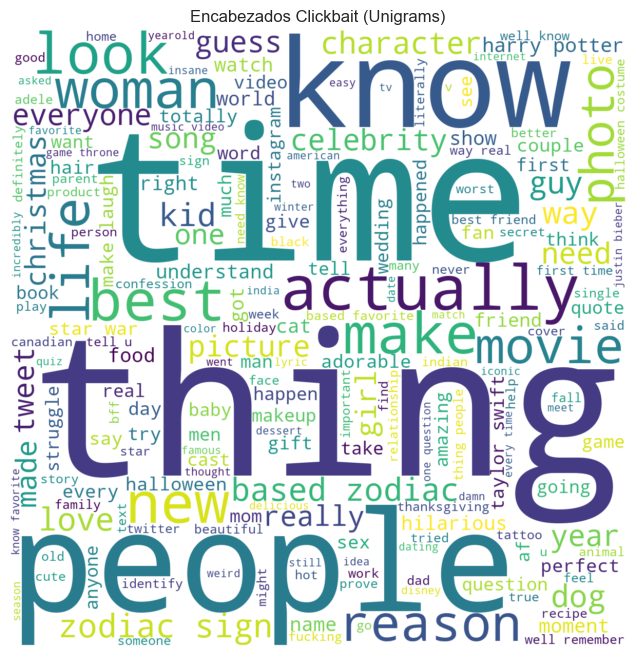

In [293]:
import matplotlib.pyplot as plt

# Nube de palabras para encabezados clickbait
plt.figure(figsize=(8,8))
plt.imshow(wordcloud_clickbait, interpolation='bilinear')
plt.axis("off")
plt.title("Encabezados Clickbait (Unigrams)")
plt.show()


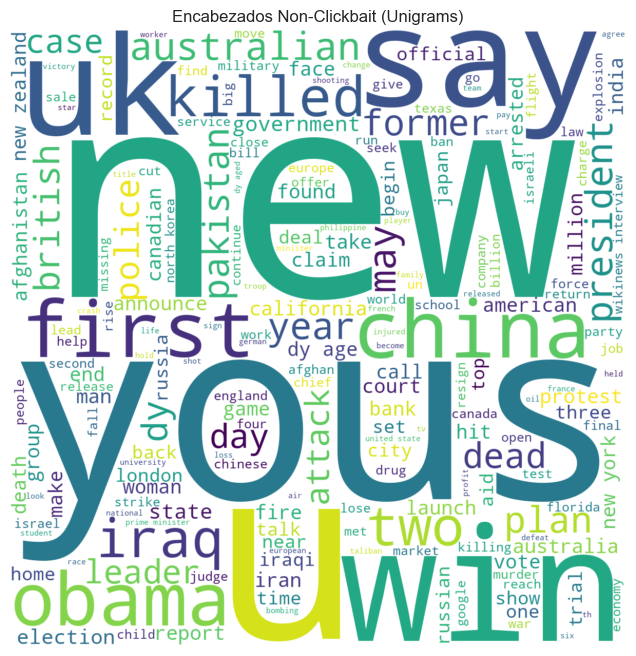

In [294]:
# Nube de palabras para encabezados non-clickbait
plt.figure(figsize=(8,8))
plt.imshow(wordcloud_non_clickbait, interpolation='bilinear')
plt.axis("off")
plt.title("Encabezados Non-Clickbait (Unigrams)")
plt.show()


In [295]:
#5) Crear dos nubes de palabras. Una para los encabezados que son clickbait, y otra con los que no lo son. Utilizar bigramas

In [296]:
from nltk import ngrams

def generate_ngrams(n, textos):
    ngrams_list = []
    for texto in textos:
        tokens = word_tokenize(texto)
        bigrams = list(ngrams(tokens, n))
        for bg in bigrams:
            ngrams_list.append(' '.join(bg))
    return pd.Series(ngrams_list).value_counts()

clickbait_texts = df[df['clickbait'] == 'clickbait']['clean_headline'].tolist()
non_clickbait_texts = df[df['clickbait'] == 'non-clickbait']['clean_headline'].tolist()

clickbait_ngrams = generate_ngrams(2, clickbait_texts)
non_clickbait_ngrams = generate_ngrams(2, non_clickbait_texts)


In [297]:

# Crear la nube de palabras para encabezados clickbait utilizando bigramas
wc_clickbait = WordCloud(
    width=1000,
    height=1000,
    colormap='Wistia_r',
    background_color='black',
    contour_width=3,
    contour_color='white',
    collocations=False,
    random_state=42,
    max_words=100,
    max_font_size=150,
    min_font_size=1
).generate_from_frequencies(clickbait_ngrams)

# Crear la nube de palabras para encabezados non-clickbait utilizando bigramas
wc_non_clickbait = WordCloud(
    width=1000,
    height=1000,
    colormap='viridis',
    background_color='black',
    contour_width=3,
    contour_color='white',
    collocations=False,
    random_state=42,
    max_words=100,
    max_font_size=150,
    min_font_size=1
).generate_from_frequencies(non_clickbait_ngrams)

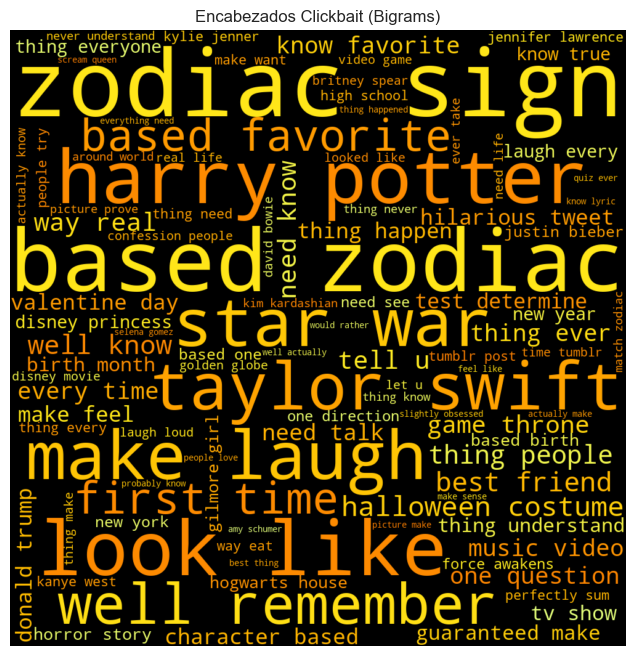

In [298]:
plt.figure(figsize=(8,8))
plt.imshow(wc_clickbait, interpolation='bilinear')
plt.axis("off")
plt.title("Encabezados Clickbait (Bigrams)")
plt.show()

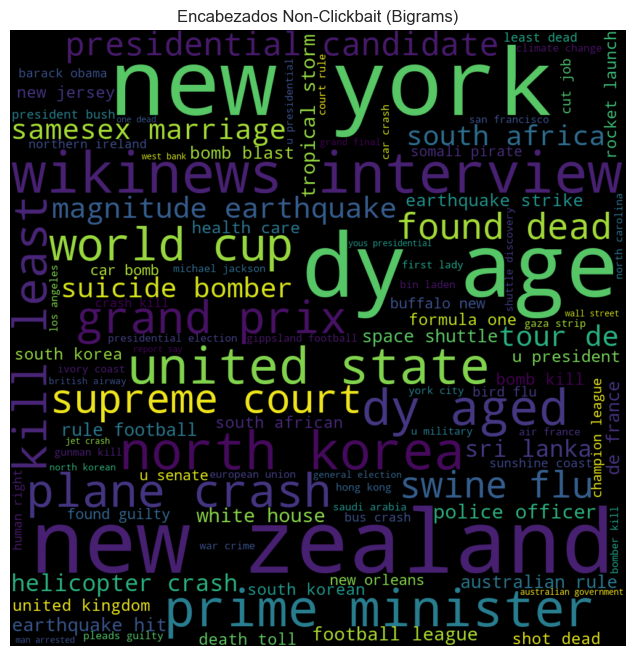

In [299]:
plt.figure(figsize=(8,8))
plt.imshow(wc_non_clickbait, interpolation='bilinear')
plt.axis("off")
plt.title("Encabezados Non-Clickbait (Bigrams)")
plt.show()

In [300]:
#6) Crear dos nubes de palabras. Una para los encabezados que son clickbait, y otra con los que no lo son. Utilizar trigramas

In [301]:
# Función para generar trigramas y contar su frecuencia en una lista de textos
def generate_trigrams(textos):
    trigrams_list = []
    for texto in textos:
        tokens = word_tokenize(texto)
        # Generar trigramas: secuencias de 3 tokens
        trigram_tuples = list(ngrams(tokens, 3))
        # Convertir cada trigrama en un token único (usamos un guion bajo para unir las palabras)
        trigrams_list.extend(['_'.join(trigram) for trigram in trigram_tuples])
    # Retornar una Serie con el conteo de cada trigrama
    return pd.Series(trigrams_list).value_counts()

# Filtrar los textos por categoría (se asume que ya se mapeó la columna "clickbait")
clickbait_texts = df[df['clickbait'] == 'clickbait']['clean_headline'].tolist()
non_clickbait_texts = df[df['clickbait'] == 'non-clickbait']['clean_headline'].tolist()

# Generar las frecuencias de trigramas para cada grupo
clickbait_trigrams = generate_trigrams(clickbait_texts)
non_clickbait_trigrams = generate_trigrams(non_clickbait_texts)


In [302]:
# Crear la nube de palabras para encabezados clickbait utilizando trigramas
wc_clickbait = WordCloud(
    width=1000,
    height=1000,
    colormap='Wistia_r',
    background_color='black',
    contour_width=3,
    contour_color='white',
    collocations=False,
    random_state=42,
    max_words=100,
    max_font_size=150,
    min_font_size=1
).generate_from_frequencies(clickbait_trigrams)

# Crear la nube de palabras para encabezados non-clickbait utilizando trigramas
wc_non_clickbait = WordCloud(
    width=1000,
    height=1000,
    colormap='viridis',
    background_color='black',
    contour_width=3,
    contour_color='white',
    collocations=False,
    random_state=42,
    max_words=100,
    max_font_size=150,
    min_font_size=1
).generate_from_frequencies(non_clickbait_trigrams)



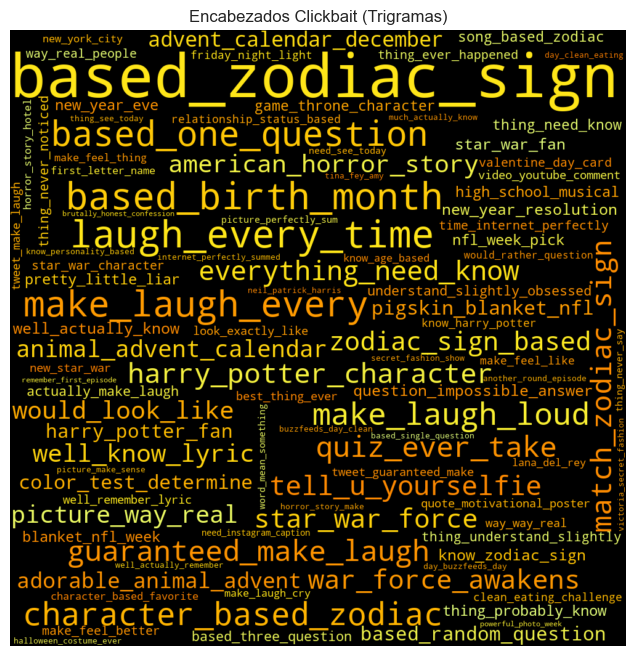

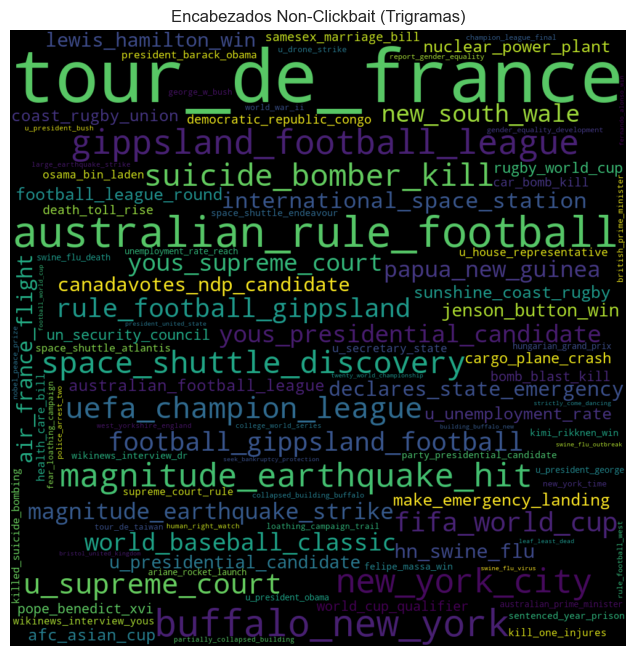

In [303]:
# Visualización de la nube de palabras para encabezados clickbait
plt.figure(figsize=(8,8))
plt.imshow(wc_clickbait, interpolation='bilinear')
plt.axis('off')
plt.title("Encabezados Clickbait (Trigramas)")
plt.show()

# Visualización de la nube de palabras para encabezados non-clickbait
plt.figure(figsize=(8,8))
plt.imshow(wc_non_clickbait, interpolation='bilinear')
plt.axis('off')
plt.title("Encabezados Non-Clickbait (Trigramas)")
plt.show()

In [304]:
#7) Escribe un comentario en el que intentes explicar la información que te ha revelado el haber creado estas nubes de palabras.
#Es decir, con base en lo mostrado, comenta que terminos parecen estar presentes cada que el encabezado es "clickbait" y
#cada que es "non-clickbait". Desarrola tu respuesta!

In [305]:
#8) Vectoriza el texto de la columna que contiene los headlines ya procesados. Para esto, utiliza un ngram range de 1 hasta 3

In [306]:

X = df['clean_headline']
y = df['clickbait']

In [307]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.7, random_state=101)

In [308]:
from sklearn.feature_extraction.text import TfidfVectorizer


In [309]:
tfidf_vectorizer = TfidfVectorizer()
x_train_vectorized = tfidf_vectorizer.fit_transform(x_train)
x_test_vectorized = tfidf_vectorizer.transform(x_test)

In [310]:
vectorizer = TfidfVectorizer(ngram_range=(1,3),max_features=1000)
x = vectorizer.fit_transform(df['clean_headline'])
features_names = vectorizer.get_feature_names_out()
print(features_names)

['absolutely' 'abuse' 'accident' 'according' 'account' 'accused' 'across'
 'action' 'actor' 'actually' 'ad' 'add' 'adele' 'adorable' 'adult'
 'advice' 'af' 'afghan' 'afghanistan' 'africa' 'african' 'age' 'aged'
 'aid' 'air' 'airline' 'airport' 'album' 'always' 'amazing' 'america'
 'american' 'amid' 'amy' 'animal' 'announces' 'another' 'answer' 'anxiety'
 'anyone' 'appeal' 'apple' 'army' 'around' 'arrest' 'arrested' 'art'
 'artist' 'ask' 'asked' 'attack' 'australia' 'australian' 'award' 'away'
 'awesome' 'awkward' 'baby' 'back' 'bad' 'badass' 'ban' 'band' 'bank'
 'bankruptcy' 'bar' 'baseball' 'based' 'based birth' 'based favorite'
 'based zodiac' 'based zodiac sign' 'battle' 'bbc' 'beat' 'beautiful'
 'beauty' 'becomes' 'begin' 'behind' 'believe' 'belong' 'best'
 'best friend' 'better' 'bff' 'bid' 'bieber' 'big' 'biggest' 'bill'
 'billion' 'bird' 'birth' 'birth month' 'black' 'blast' 'board' 'body'
 'bomb' 'bomber' 'bombing' 'bond' 'book' 'bowl' 'boy' 'boyfriend' 'brazil'
 'brazilian' 'b

In [311]:
#9) Utiliza TSNE para visualizar en dos dimensiones el texto vectorizado. Asigna la columna de
#"clickbait" como la variable que dara color a los puntos del grafico y la columna "headline" para mostrar el texto
#cada que el cursor pase por algun punto

In [335]:
import plotly.express as px
from sklearn.manifold import TSNE


In [338]:
model = TSNE(n_components=2, init='random')
tsne_result = model.fit_transform(vectorizer.fit_transform(df['clean_headline']))
df['tsne_1'] = tsne_result[:,0]
df['tsne_2'] = tsne_result[:,1]

In [314]:
#10) Escribe un comentario donde desarrolles tu analisis sobre la imagen generada. Encuentras algun agrupamiento? Se distinguen
#las clases imaginando alguna linea sobre la imagen?. Desarrolla tu respuesta

In [315]:
#11) Crea un modelo de regresion logistica para clasificar encabezados que son "clickbait" y "non-clickbait". Generar el reporte de clasificacion
#y la matriz de confusion correspondiente

In [316]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()

In [317]:
model.fit(x_train_vectorized, y_train)

LogisticRegression()

In [318]:
y_pred = model.predict(x_test_vectorized)

In [319]:
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
import seaborn as sns

In [320]:
print(classification_report(y_test, y_pred))

               precision    recall  f1-score   support

    clickbait       0.95      0.92      0.94     11195
non-clickbait       0.92      0.95      0.94     11205

     accuracy                           0.94     22400
    macro avg       0.94      0.94      0.94     22400
 weighted avg       0.94      0.94      0.94     22400



<Axes: >

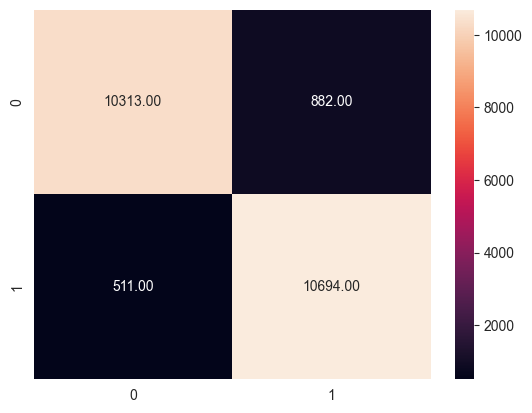

In [321]:
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='.2f')


In [322]:
#12) Crea un modelo de maquina de soporte vectorial para clasificar encabezados que son "clickbait" y "non-clickbait". Generar el reporte de clasificacion
#y la matriz de confusion correspondiente

In [323]:
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
import seaborn as sns

               precision    recall  f1-score   support

    clickbait       0.96      0.94      0.95     11195
non-clickbait       0.94      0.96      0.95     11205

     accuracy                           0.95     22400
    macro avg       0.95      0.95      0.95     22400
 weighted avg       0.95      0.95      0.95     22400



<Axes: >

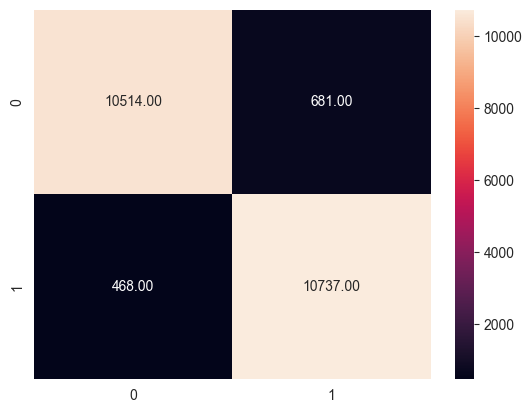

In [324]:
model_1 = SVC()
model_1.fit(x_train_vectorized, y_train)
y_pred = model_1.predict(x_test_vectorized)

print(classification_report(y_test, y_pred))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='.2f')

In [325]:
#13) Crea un modelo de Random Forest para clasificar encabezados que son "clickbait" y "non-clickbait". Generar el reporte de clasificacion
#y la matriz de confusion correspondiente

In [326]:
from sklearn.ensemble import RandomForestClassifier


In [327]:
model = RandomForestClassifier()
model.fit(x_train_vectorized, y_train)
y_pred = model.predict(x_test_vectorized)

In [328]:
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
import seaborn as sns

In [329]:
print(classification_report(y_test, y_pred))

               precision    recall  f1-score   support

    clickbait       0.87      0.95      0.91     11195
non-clickbait       0.94      0.86      0.90     11205

     accuracy                           0.90     22400
    macro avg       0.91      0.90      0.90     22400
 weighted avg       0.91      0.90      0.90     22400



<Axes: >

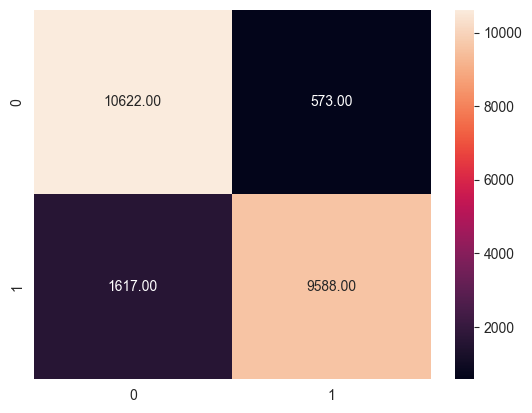

In [330]:
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='.2f')

In [331]:
#14) Poner un comentario en el que justifiques cual de los modelos generados es mejor. Desarrolla tu respuesta

In [332]:
#15) Utiliza el mejor modelo para clasificar estos encabezados:
# -> "Find out What Star Wars Character you are"
# -> "California wildfire spreads out of control"
# -> "What is Taylor Swift up to?"

In [333]:
new_headlines = [
 "Find out What Star Wars Character you are",
    "California wildfire spreads out of control",
    "What is Taylor Swift up to?"
]

In [334]:
new_vectorizer = vectorizer.transform(new_headlines)

predictions = model.predict(new_vectorizer)
print(predictions)

ValueError: X has 1000 features, but RandomForestClassifier is expecting 11465 features as input.

In [273]:
#16) EXTRA: Construye tu modelo utilizando GridSearch